<a href="https://colab.research.google.com/github/soudeep-web/Assignment-03/blob/main/Task1_BH(Reg_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION MODEL**Boston Housing Dataset..

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/housing.csv")
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


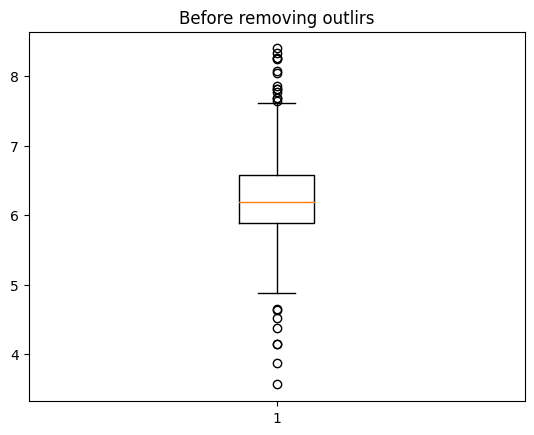

In [ ]:
plt.boxplot(data['RM'])
plt.title("Before removing outlirs")
plt.show()

In [ ]:
# 1. Fixed Acidity
Q1_facidity = np.percentile(data["RM"],25)
Q3_facidity = np.percentile(data["RM"],75)
IQR_facidity = Q3_facidity - Q1_facidity
Upper_facidity = Q3_facidity + 1.5 * IQR_facidity
Lower_facidity = Q1_facidity - 1.5 * IQR_facidity
fixed="RM"

In [ ]:
# 1. Fixed Acidity
Outliers_facidity_indices = data[(data[fixed]<Lower_facidity) | (data[fixed]>Upper_facidity)].index
print(Outliers_facidity_indices)

Int64Index([ 97,  98, 176, 197, 217, 218, 220, 224, 225, 245, 253, 263, 270,
            272, 353, 355, 357, 367, 369, 389, 395, 397],
           dtype='int64')


In [ ]:
# Remove Outliers
# 1. Fixed Acidity
remove_facidity = data.drop(Outliers_facidity_indices, inplace = True)

In [ ]:
plt.boxplot(data["RM"])
plt.title("After removing outliers")
plt.show()

In [ ]:
# Before removing outliers
plt.boxplot(data['LSTAT'])
plt.title("Before removing outlirs")
plt.show()

In [ ]:
# 2. Volatile Acidity
Q1_vacidity = np.percentile(data["LSTAT"],25)
Q3_vacidity = np.percentile(data["LSTAT"],75)
IQR_vacidity = Q3_vacidity - Q1_vacidity
Upper_vacidity = Q3_vacidity + 1.5 * IQR_vacidity
Lower_vacidity = Q1_vacidity - 1.5 * IQR_vacidity
volatile="LSTAT"

In [ ]:
# 2. Volatile Acidity
Outliers_vacidity_indices = data[(data[volatile]<Lower_vacidity) | (data[volatile]>Upper_vacidity)].index
print(Outliers_vacidity_indices)

Int64Index([141, 356, 370, 421], dtype='int64')


In [ ]:
# 2. Volatile Acidity
remove_vacidity = data.drop(Outliers_vacidity_indices, inplace= True)

In [ ]:
# After removing outliers
plt.boxplot(data["LSTAT"])
plt.title("After removing outliers")
plt.show()

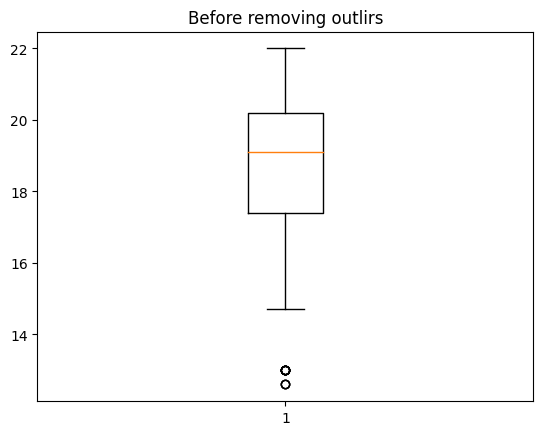

In [ ]:
# Before removing outliers
plt.boxplot(data['PTRATIO'])
plt.title("Before removing outlirs")
plt.show()

In [ ]:
# 3. Citric Acid
Q1_acid = np.percentile(data["PTRATIO"],25)
Q3_acid = np.percentile(data["PTRATIO"],75)
IQR_acid = Q3_acid - Q1_acid
Upper_acid = Q3_acid + 1.5 * IQR_acid
Lower_acid = Q1_acid - 1.5 * IQR_acid
citric="PTRATIO"

In [ ]:
# 3. Citric Acid
Outliers_citric_indices = data[(data[citric]<Lower_acid) | (data[citric]>Upper_acid)].index
print(Outliers_citric_indices)

Int64Index([190, 191, 192, 249, 250, 251, 252, 254, 255, 256, 257, 258], dtype='int64')


In [ ]:
# 3. Citric Acid
remove_citric = data.drop(Outliers_citric_indices, inplace = True)

In [ ]:
plt.boxplot(data["PTRATIO"])
plt.title("After removing outliers")
plt.show()

In [ ]:
plt.boxplot(data["MEDV"])
plt.title("Before removing outliers")
plt.show()

In [ ]:
# 4. Residual Sugar
Q1_sugar = np.percentile(data["MEDV"],25)
Q3_sugar = np.percentile(data["MEDV"],75)
IQR_sugar = Q3_sugar - Q1_sugar
Upper_sugar = Q3_sugar + 1.5 * IQR_sugar
Lower_sugar = Q1_sugar - 1.5 * IQR_sugar
sugar="MEDV"

In [ ]:
# 4.  Residual Sugar
Outliers_sugar_indices = data[(data[sugar]<Lower_sugar) | (data[sugar]>Upper_sugar)].index
print(Outliers_sugar_indices)

Int64Index([4, 55, 157, 175, 177, 178, 185, 187, 196, 248, 271, 280, 293, 381,
            388],
           dtype='int64')


In [ ]:
# 4.  Residual Sugar
remove_sugar = data.drop(Outliers_sugar_indices, inplace = True)

In [ ]:
plt.boxplot(data["MEDV"])
plt.title("After removing outliers")
plt.show()

In [ ]:
#Check duplicate values in dataset
print(data.duplicated())
#No duplicate data found

0      False
1      False
2      False
3      False
5      False
       ...  
484    False
485    False
486    False
487    False
488    False
Length: 436, dtype: bool


In [ ]:
#Check Null value
data.isna()

<Axes: >

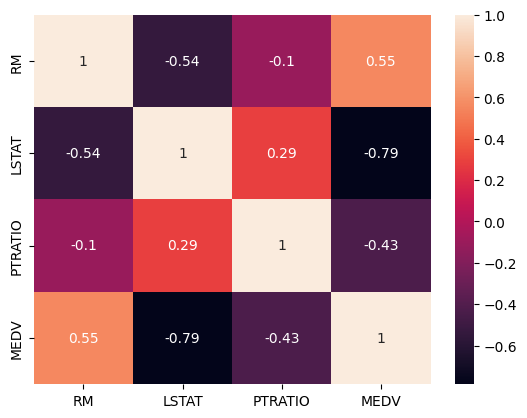

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
#Import LinearRegression Model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Devide data into x,y
X = data[["RM","LSTAT","PTRATIO"]]
y= data[["MEDV"]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [ ]:
model = LinearRegression()

**After removing null value model.fit() works**

In [ ]:
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
#Find interception
model.intercept_

array([547146.16533227])

In [ ]:
model.coef_

array([[ 55164.03389447, -11535.49224433, -16542.86634812]])

In [ ]:
X_train.columns

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

In [ ]:
#Error Here
# df = pd.DataFrame(model.coef_,X.columns, columns = ['New'])


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
newData = [[7.035,	8.68,	21.56]]

In [ ]:
model.predict(newData)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[478432.87263361]])

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
 from sklearn import metrics

In [ ]:
# y_test = actual , y_pred = points.....
MSE = metrics.mean_squared_error(y_test,y_pred)
MSE

3901445207.269173

In [ ]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.7196547401727048